# Data Acquistion

In [1]:
import pandas as pd

data = 'dataset/'
train_df = pd.read_csv(data +'train.csv')
test_df = pd.read_csv(data + 'test.csv')
full_df = [train_df, test_df]

train_df.info()
print('_'*50)
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [2]:

train_df.head()
print('_'*50)



__________________________________________________


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Wrangling

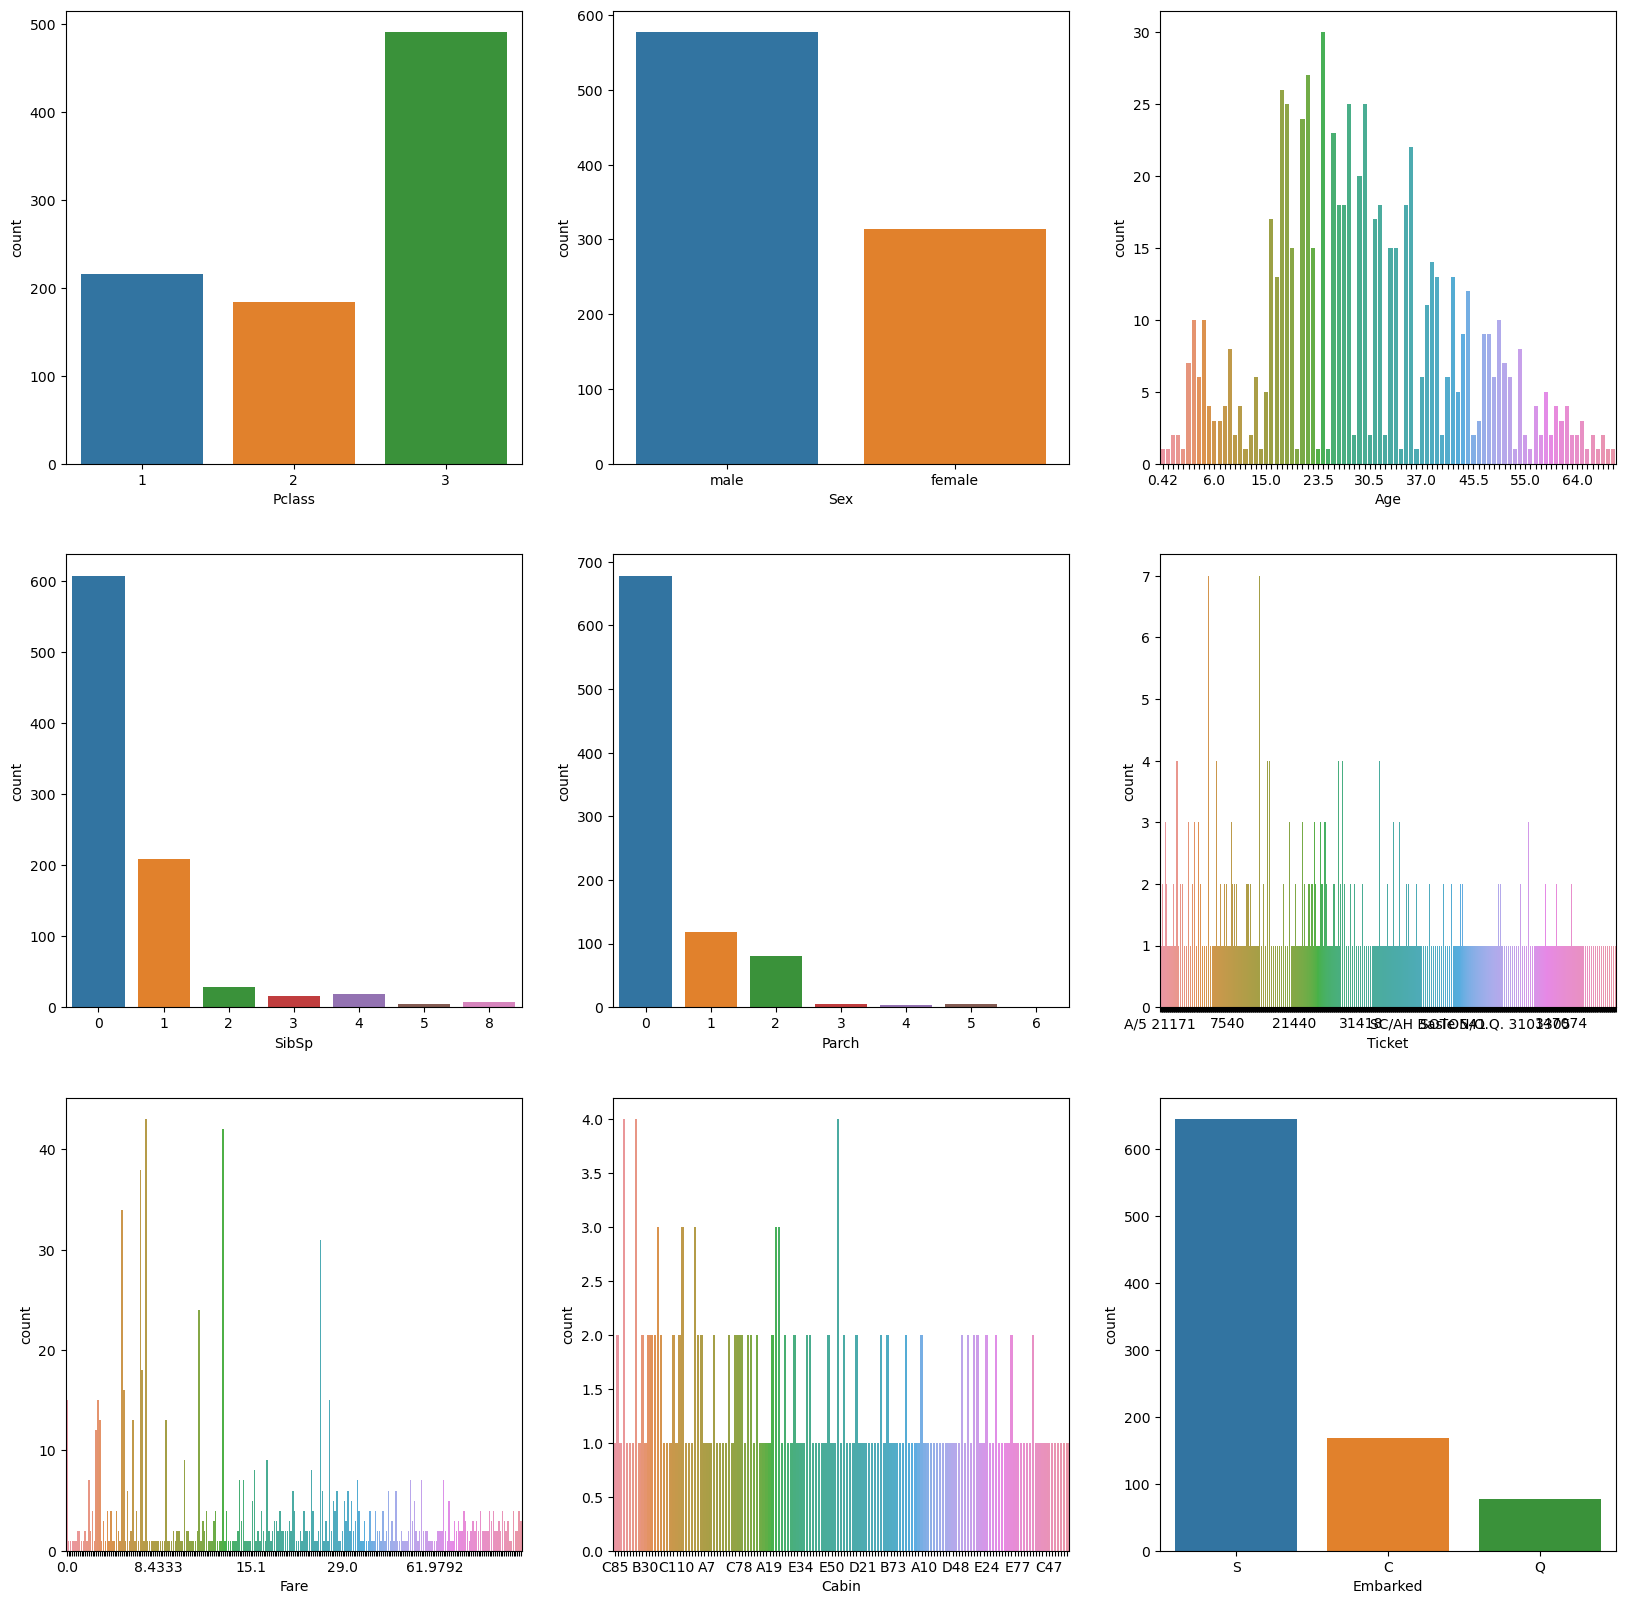

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Decrease the density of x labels
def decrease_density(ax, rate):
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % rate == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)

# Set the Grid Plot
f, ax_arr = plt.subplots(3, 3, figsize=(20, 20))

# Build the barplot
sns.countplot(x="Pclass", data=train_df, ax=ax_arr[0][0])
sns.countplot(x="Sex", data=train_df, ax=ax_arr[0][1])
g = sns.countplot(x="Age", data=train_df, ax=ax_arr[0][2])
decrease_density(ax_arr[0][2], 10)
sns.countplot(x="SibSp", data=train_df, ax=ax_arr[1][0])
sns.countplot(x="Parch", data=train_df, ax=ax_arr[1][1])
sns.countplot(x="Ticket", data=train_df, ax=ax_arr[1][2])
decrease_density(ax_arr[1][2], 100)
sns.countplot(x="Fare", data=train_df, ax=ax_arr[2][0])
decrease_density(ax_arr[2][0], 50)
sns.countplot(x="Cabin", data=train_df, ax=ax_arr[2][1])
decrease_density(ax_arr[2][1], 10)
sns.countplot(x="Embarked", data=train_df, ax=ax_arr[2][2])

# Delete the seaborn plots
for i in range(2, 11):
    plt.close(i)


In [5]:
# Drop no relevant features
new_train_df = train_df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)
new_test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [6]:
print(new_train_df.isnull().sum())
print('_'*40)
new_test_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
________________________________________


Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [7]:
new_train_df['Age'].fillna(new_train_df['Age'].median(), inplace=True)
new_test_df['Age'].fillna(new_test_df['Age'].median(),inplace=True)

new_train_df['Embarked'].fillna(new_train_df['Embarked'].mode(), inplace=True)
new_test_df['Fare'].fillna(new_test_df['Fare'].median(),inplace=True)


In [8]:
new_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
new_train_df['Pclass'].value_counts().sort_values()

2    184
1    216
3    491
Name: Pclass, dtype: int64

In [10]:
# Build the Family features

new_train_df['Family'] = new_train_df['SibSp'] + new_train_df['Parch']+1
new_test_df['Family'] = new_test_df['SibSp'] + new_test_df['Parch'] + 1
new_train_df = new_train_df.drop(['SibSp', 'Parch'], axis=1)
new_test_df = new_test_df.drop(['SibSp', 'Parch'], axis=1)

# Build the Title features
new_train_df['Title'] = train_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
new_test_df['Title'] = test_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [11]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical variables Sex, Embarked and Title into dummy variables
label = LabelEncoder()
new_train_df['Sex'] = label.fit_transform(new_train_df['Sex'])
new_test_df['Sex'] = label.fit_transform(new_test_df['Sex'])

new_train_df['Embarked'] = label.fit_transform(new_train_df['Embarked'])
new_test_df['Embarked'] = label.fit_transform(new_test_df['Embarked'])

new_train_df['Title'] = label.fit_transform(new_train_df['Title'])
new_test_df['Title'] = label.fit_transform(new_test_df['Title'])

# Convert continuous variables Age and Fare to categorical variables
new_train_df['Age'] = pd.cut(new_train_df['Age'], 10)
new_test_df['Age'] = pd.cut(new_test_df['Age'], 10)
new_train_df['Fare'] = pd.cut(new_train_df['Fare'], 10)
new_test_df['Fare'] = pd.cut(new_test_df['Fare'], 10)

new_train_df['Age'] = label.fit_transform(new_train_df['Age'])
new_test_df['Age'] = label.fit_transform(new_test_df['Age'])

new_train_df['Fare'] = label.fit_transform(new_train_df['Fare'])
new_test_df['Fare'] = label.fit_transform(new_test_df['Fare'])

new_train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title
0,0,3,1,2,0,2,2,11
1,1,1,0,4,1,0,2,12
2,1,3,0,3,0,2,1,8
3,1,1,0,4,1,2,2,12
4,0,3,1,4,0,2,1,11


In [12]:
new_train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Analysis

In [13]:
new_train_df[['Pclass', 'Survived']].groupby(['Pclass'],as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
new_train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [15]:
new_train_df[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean()

,Fare,Survived
0,0,0.318306
1,1,0.660377
2,2,0.741935
3,3,1.000000
4,4,0.636364
5,5,0.666667
6,6,1.000000


In [16]:
new_train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,0,0.553571
1,1,0.389610
2,2,0.336957
3,3,1.000000


In [17]:
new_train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [18]:
new_train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0,0.000000
1,1,0.500000
2,2,0.000000
3,3,0.428571
4,4,0.000000
5,5,1.000000
6,6,0.500000
7,7,0.575000
8,8,0.697802
9,9,1.000000


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

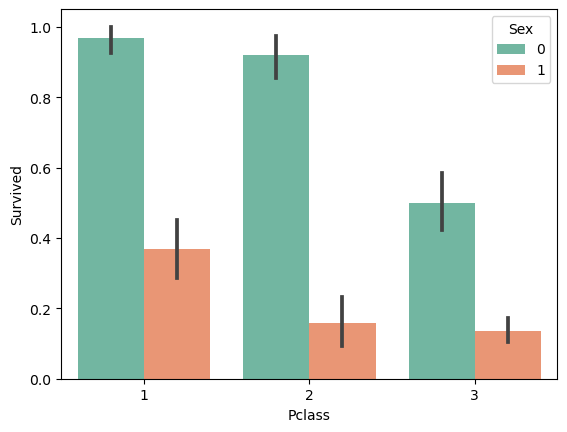

In [19]:
# sns.barplot(x='Pclass', y='Survived', hue='Sex', data=new_train_df, color=['blue','pink'])
import seaborn as sns

# Create a bar plot
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=new_train_df, palette = 'Set2')


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

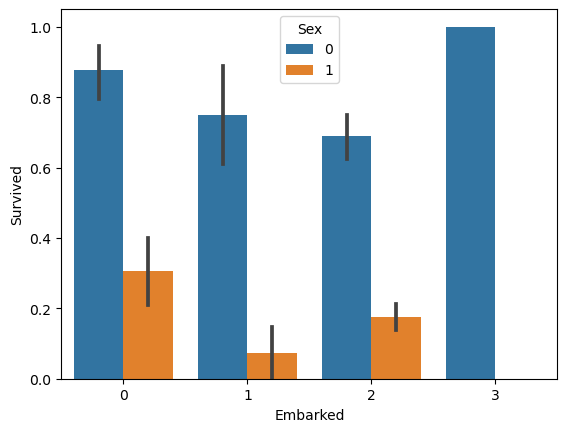

In [20]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=new_train_df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

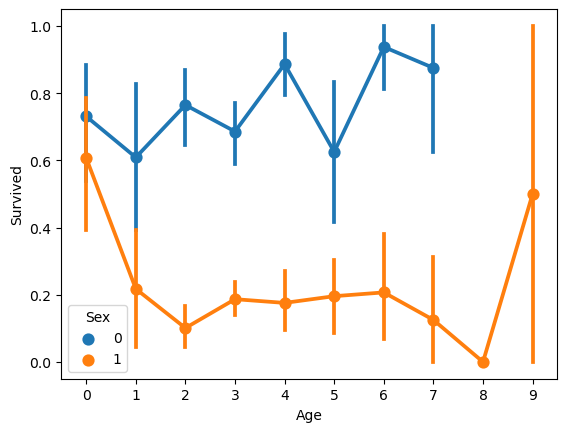

In [21]:
sns.pointplot(x='Age', y='Survived', hue='Sex', data=new_train_df)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

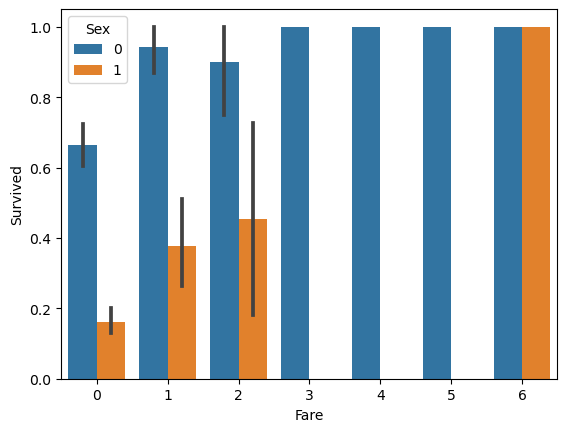

In [22]:
sns.barplot(x='Fare', y='Survived', hue='Sex', data=new_train_df)

<AxesSubplot:xlabel='Family', ylabel='Survived'>

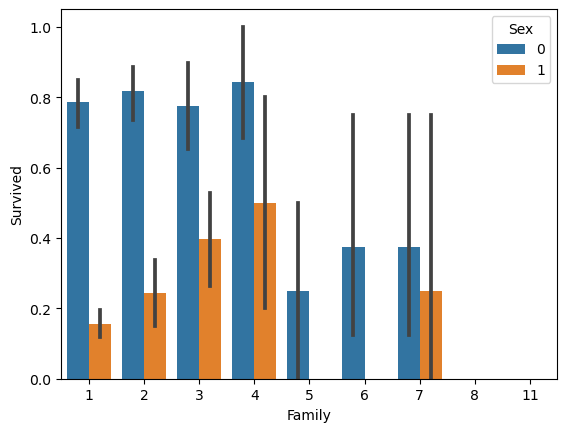

In [23]:
sns.barplot(x='Family', y='Survived', hue='Sex', data=new_train_df)

# Model Training and Prediction

In [24]:
# Import ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train = new_train_df.drop("Survived", axis = 1)
Y_train = new_train_df['Survived']
X_val = new_test_df

X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.33, random_state = 42)

In [25]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

acc_log = round(accuracy_score(y_test, Y_pred)*100,2)
acc_log

81.69

In [26]:
coeff_df = pd.DataFrame(new_train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,Fare,0.191902
6,Title,-0.021400
5,Family,-0.192573
2,Age,-0.224252
4,Embarked,-0.330064
0,Pclass,-0.851279
1,Sex,-2.453017


In [27]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_test, Y_pred)*100,2)
acc_svc

82.03

In [28]:
# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_test, Y_pred) * 100, 2)
acc_knn

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


80.0

In [29]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_test, Y_pred) * 100, 2)
acc_gaussian

80.0

In [32]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(y_test, Y_pred) * 100, 2)
acc_perceptron

44.41

In [33]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(y_test, Y_pred) * 100, 2)
acc_sgd

71.86

In [34]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(y_test, Y_pred) * 100, 2)
acc_decision_tree

80.34

In [35]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(accuracy_score(y_test, Y_pred) * 100, 2)
acc_random_forest

80.68

In [36]:
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.model_selection import GridSearchCV

svc = SVC()

# Choose some parameter combinations to try
parameters = {
    'C': [0.3, 0.7, 1.0, 1.3, 1.7, 2],
    'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
    'degree': [1, 2, 3, 4, 5],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(svc, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

SVC(degree=4, kernel='poly')

In [37]:
Y_pred = clf.predict(X_test)
acc_svc = round(accuracy_score(y_test, Y_pred) * 100, 2)
acc_svc

84.07

In [42]:

from sklearn.model_selection import KFold
import numpy as np

X_train_values = new_train_df.drop("Survived", axis=1).values
Y_train_values = new_train_df["Survived"].values

kf = KFold(n_splits=10)
outcomes = []
fold = 0

for train_index, test_index in kf.split(X_train_values):
    fold += 1
    X_train, X_test = X_train_values[train_index], X_train_values[test_index]
    y_train, y_test = Y_train_values[train_index], Y_train_values[test_index]
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    outcomes.append(accuracy)
    print("Fold {0} accuracy: {1}".format(fold, accuracy))     
mean_outcome = np.mean(outcomes)
print("Mean Accuracy: {0}".format(mean_outcome))


Fold 1 accuracy: 0.8111111111111111
Fold 2 accuracy: 0.8651685393258427
Fold 3 accuracy: 0.7752808988764045
Fold 4 accuracy: 0.8651685393258427
Fold 5 accuracy: 0.7865168539325843
Fold 6 accuracy: 0.8314606741573034
Fold 7 accuracy: 0.7752808988764045
Fold 8 accuracy: 0.8089887640449438
Fold 9 accuracy: 0.8651685393258427
Fold 10 accuracy: 0.8426966292134831
Mean Accuracy: 0.8226841448189761


In [39]:
!pip install -U scikit-learn


     ---------------------------------------- 9.2/9.2 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
